In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures,StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
#from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, auc,plot_roc_curve, roc_curve
import category_encoders as ce

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import mannwhitneyu

import pingouin as pg
from sklearn.metrics import SCORERS,accuracy_score



D:\anaconda\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


kolom di nba dan new beda,

In [2]:
## Download Data From Github
# import requests
# url = 'https://raw.githubusercontent.com/ridhoaryo/Ujian_Modul3_NBA/main/new_players.csv'
# res = requests.get(url, allow_redirects=True)
# with open('new_players.csv','wb') as file:
#     file.write(res.content)
# nba = pd.read_csv('new_players.csv')

## Cek Data Set

In [3]:
nba = pd.read_csv('D:/anaconda/pwd/modul3/data/nba_players.csv')
nba.head()

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [4]:
new = pd.read_csv('D:/anaconda/pwd/modul3/data/new_players.csv')

In [5]:
new.head()

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037


In [6]:
nba.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'potential_player'],
      dtype='object')

In [7]:
new.columns

Index(['Unnamed: 0', 'player_id', 'age', 'player_height', 'player_weight',
       'college', 'country', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')

In [8]:
nba.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
potential_player     0
dtype: int64

In [9]:
new.isna().sum()

Unnamed: 0       0
player_id        0
age              0
player_height    0
player_weight    0
college          0
country          0
gp               0
pts              0
reb              0
ast              0
net_rating       0
oreb_pct         0
dreb_pct         0
usg_pct          0
ts_pct           0
ast_pct          0
dtype: int64

#### Tidakada null value

In [10]:
nba.describe()

,Unnamed: 0,Unnamed: 0.1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,0.040825
std,3217.428709,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.197895
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,0.000000
50%,5572.000000,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,0.000000
75%,8358.000000,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,0.000000
max,11144.000000,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000


In [11]:
new.describe()

,Unnamed: 0,player_id,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,250.500000,27.140000,201.077920,101.156741,53.246000,8.381200,3.60820,1.714200,-3.001400,0.054912,0.142798,0.188166,0.506756,0.125532
std,144.481833,144.481833,4.214252,9.351931,12.643817,25.219467,6.016088,2.38932,1.644539,11.786318,0.042551,0.058589,0.052081,0.102860,0.092083
min,0.000000,1.000000,19.000000,160.020000,60.327736,1.000000,0.000000,0.00000,0.000000,-96.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.750000,125.750000,24.000000,195.580000,92.646166,33.000000,3.600000,1.87500,0.600000,-6.325000,0.021000,0.100000,0.154000,0.478000,0.063000
50%,249.500000,250.500000,27.000000,203.200000,99.790240,61.000000,7.100000,3.20000,1.200000,-2.050000,0.044500,0.133000,0.184500,0.524000,0.099000
75%,374.250000,375.250000,30.000000,208.280000,111.130040,75.250000,11.800000,4.80000,2.300000,2.700000,0.085000,0.180000,0.218000,0.557250,0.170000
max,499.000000,500.000000,40.000000,231.140000,137.438376,83.000000,31.400000,15.60000,9.700000,66.700000,0.360000,0.364000,0.500000,1.050000,0.667000


In [12]:
nba.dtypes

Unnamed: 0             int64
Unnamed: 0.1           int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
potential_player       int64
dtype: object

In [13]:
new.dtypes

Unnamed: 0         int64
player_id          int64
age              float64
player_height    float64
player_weight    float64
college           object
country           object
gp                 int64
pts              float64
reb              float64
ast              float64
net_rating       float64
oreb_pct         float64
dreb_pct         float64
usg_pct          float64
ts_pct           float64
ast_pct          float64
dtype: object

In [14]:
# cek multicoll
nba.corr()

,Unnamed: 0,Unnamed: 0.1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
Unnamed: 0,1.000000,1.000000,-0.123543,-0.026447,-0.047329,-0.045959,0.034429,-0.001385,0.013879,0.011620,-0.148041,0.026208,-0.034313,0.119268,-0.007876,0.028590
Unnamed: 0.1,1.000000,1.000000,-0.123543,-0.026447,-0.047329,-0.045959,0.034429,-0.001385,0.013879,0.011620,-0.148041,0.026208,-0.034313,0.119268,-0.007876,0.028590
age,-0.123543,-0.123543,1.000000,-0.013981,0.046904,0.046221,-0.000810,0.028319,0.083695,0.088161,-0.064672,0.012451,-0.133839,0.025627,0.063037,0.009211
player_height,-0.026447,-0.026447,-0.013981,1.000000,0.829901,-0.005844,-0.059748,0.422547,-0.463908,-0.009260,0.589033,0.614650,-0.110438,0.069810,-0.632000,-0.085887
player_weight,-0.047329,-0.047329,0.046904,0.829901,1.000000,0.009308,-0.032130,0.436762,-0.395356,-0.000503,0.603258,0.606327,-0.074495,0.060416,-0.547488,-0.062429
gp,-0.045959,-0.045959,0.046221,-0.005844,0.009308,1.000000,0.543846,0.471562,0.388840,0.251260,-0.021649,0.060702,0.138119,0.389950,0.134544,0.141288
pts,0.034429,0.034429,-0.000810,-0.059748,-0.032130,0.543846,1.000000,0.623909,0.652098,0.217883,-0.121267,0.048110,0.633110,0.382417,0.322214,0.421311
reb,-0.001385,-0.001385,0.028319,0.422547,0.436762,0.471562,0.623909,1.000000,0.224217,0.190416,0.411597,0.606899,0.221804,0.314563,-0.087725,0.201826
ast,0.013879,0.013879,0.083695,-0.463908,-0.395356,0.388840,0.652098,0.224217,1.000000,0.165236,-0.349217,-0.215141,0.378803,0.180234,0.802008,0.503401
net_rating,0.011620,0.011620,0.088161,-0.009260,-0.000503,0.251260,0.217883,0.190416,0.165236,1.000000,0.056177,0.036148,-0.004305,0.309536,0.060158,0.089950


In [15]:
new.corr()

,Unnamed: 0,player_id,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
Unnamed: 0,1.000000,1.000000,-0.047710,0.108106,0.109595,0.064789,0.033387,0.119152,-0.025562,0.090118,0.081497,0.057965,-0.016323,0.048635,-0.102703
player_id,1.000000,1.000000,-0.047710,0.108106,0.109595,0.064789,0.033387,0.119152,-0.025562,0.090118,0.081497,0.057965,-0.016323,0.048635,-0.102703
age,-0.047710,-0.047710,1.000000,-0.096787,-0.048219,0.001957,-0.051954,-0.053751,0.100629,0.056767,-0.108937,-0.049281,-0.191482,0.012654,0.091874
player_height,0.108106,0.108106,-0.096787,1.000000,0.836025,0.032664,-0.090696,0.394947,-0.508427,-0.040475,0.606111,0.626527,-0.104722,0.023441,-0.647083
player_weight,0.109595,0.109595,-0.048219,0.836025,1.000000,0.084623,-0.061090,0.416620,-0.441709,-0.043184,0.627947,0.630275,-0.063858,0.026593,-0.581076
gp,0.064789,0.064789,0.001957,0.032664,0.084623,1.000000,0.538104,0.490857,0.369388,0.381061,0.050006,0.108504,0.130989,0.461727,0.087846
pts,0.033387,0.033387,-0.051954,-0.090696,-0.061090,0.538104,1.000000,0.639141,0.640445,0.319315,-0.118341,0.033620,0.602534,0.406234,0.255818
reb,0.119152,0.119152,-0.053751,0.394947,0.416620,0.490857,0.639141,1.000000,0.201833,0.267918,0.413371,0.611569,0.224197,0.316342,-0.138100
ast,-0.025562,-0.025562,0.100629,-0.508427,-0.441709,0.369388,0.640445,0.201833,1.000000,0.248756,-0.372985,-0.254535,0.333462,0.213400,0.766479
net_rating,0.090118,0.090118,0.056767,-0.040475,-0.043184,0.381061,0.319315,0.267918,0.248756,1.000000,0.022756,0.010932,-0.062429,0.405644,0.099211


# 1. Data Preprocessing
- hapus kolom tiodak di gunakan
- missing value
- encoding
- feture yang di gunakan

In [16]:
nba.head()

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [17]:
nba.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'potential_player'],
      dtype='object')

In [18]:
nba['potential_player'].value_counts()

0    10690
1      455
Name: potential_player, dtype: int64

### Nba Cleaning

In [19]:
nba2 = nba.drop(['Unnamed: 0', 'Unnamed: 0.1','player_name','college', 'country',
                 'team_abbreviation','season','draft_year','draft_round', 'draft_number'], axis = 1)

In [20]:
nba2.columns

Index(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct',
       'potential_player'],
      dtype='object')

## Visualisasi data

In [21]:
da = list(nba2['potential_player'].value_counts().values)
da
la = list(nba2['potential_player'].value_counts().index)

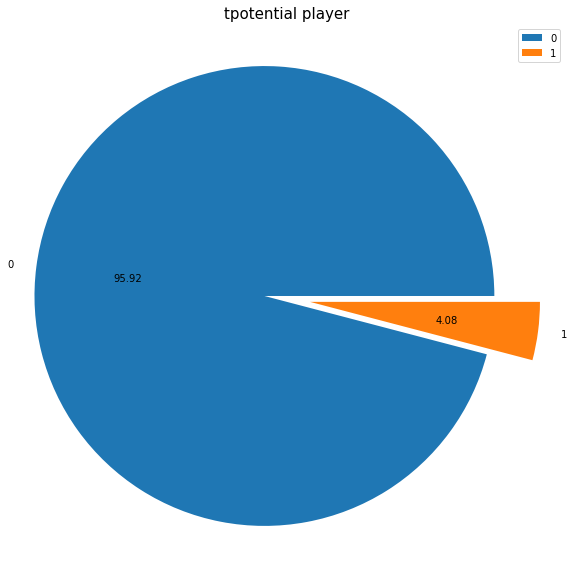

In [22]:
plt.figure(figsize = (10,10))
plt.pie(da,labels=la,autopct = '%.2f',explode=(0,0.2))
plt.axis('equal')
plt.legend(loc = 0)
plt.title('tpotential player',size = 15)
plt.show()

di daalam dataset terdapat 4.08%  yang di anggap sebagai potential player

In [23]:
# non potential
p0 = nba[nba['potential_player'] == 0]
p0.head(1)

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.1,0.479,0.113,1996-97,0


In [24]:
nba.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'potential_player'],
      dtype='object')

Bagaimana distribusi score antara pemain yang potential dengan yang tidak potential?

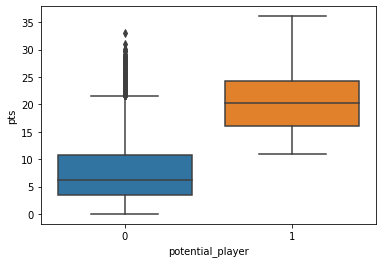

In [25]:
sns.boxplot(x='potential_player', y='pts', data=nba)
plt.show()

rata rata pemain dengan label 1 atau potential player lebih sering mencetak score di bandingkan player dengan label 0

Bagaimana distribusi assist antara pemain yang potential dengan yang tidak potential?

<AxesSubplot:xlabel='potential_player', ylabel='ast'>

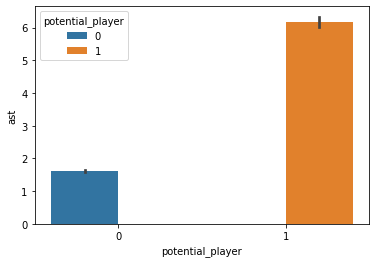

In [26]:
sns.barplot(data=nba,x='potential_player',y='ast',hue='potential_player')

potential player lebih banyak membuat asist(ast)

pada gp (game played throughout the season) pemain yang dengan label potential_player lebih banyak bermain

Bagaimana distribusi rebound antara pemain yang potential dengan yang tidak potential?

<AxesSubplot:xlabel='potential_player', ylabel='reb'>

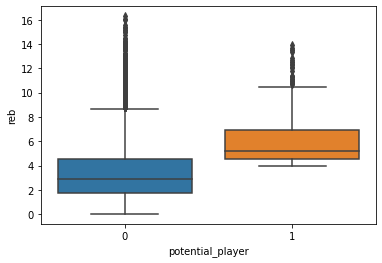

In [27]:
sns.boxplot(x='potential_player', y='reb', data=nba)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


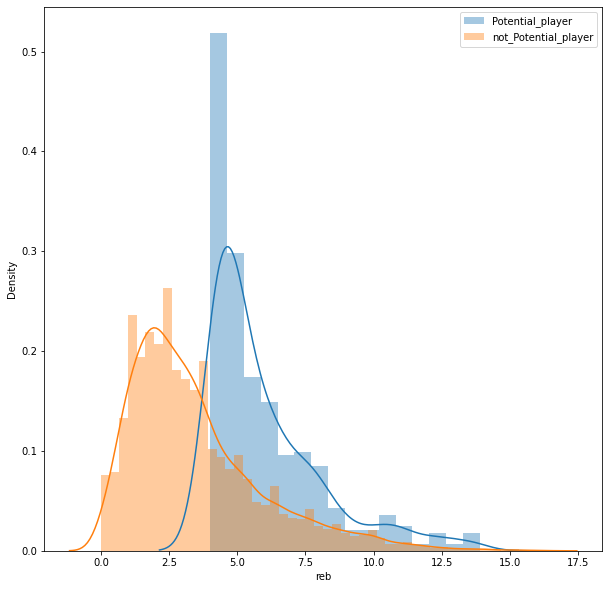

In [28]:
plt.figure(figsize=[10,10])
sns.distplot(nba[nba['potential_player'] ==1]['reb'],label='Potential_player')
sns.distplot(nba[nba['potential_player'] ==0]['reb'],label='not_Potential_player')
plt.legend()
plt.show()

pada plot di atas dapat di ketahui bahwa rebound grabbed(reb) yang di lakukan oleh potential_player lebih bnayak di bandingkan non_potential player

Kampus mana yang paling sering menelurkan pemain-pemain potential di NBA?

In [120]:
get_camp = nba[['college','potential_player','player_name']]
pot = get_camp[get_camp['potential_player']==1].groupby(['college']).count()
pot.sort_values('potential_player', ascending = False)

# Dari DF di bawah dapat kita ketahui potential player banyak yang berasal dari luar kampus

,potential_player,player_name
college,,
None,93,93
Kentucky,36,36
UCLA,28,28
Marquette,18,18
Arizona,17,17
...,...,...
Purdue,1,1
Indiana Purdue-Indianapolis,1,1
Santa Clara,1,1


Apakah tinggi dan berat pemain dapat mempengaruhi pemain dicap potential atau tidak?

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


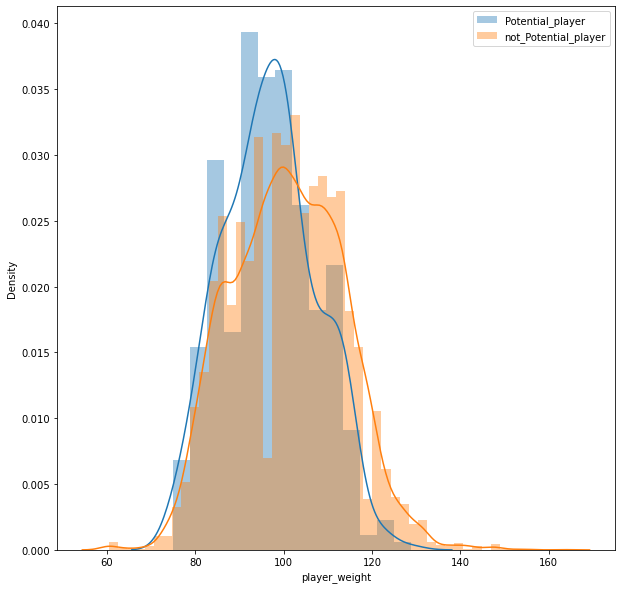

In [29]:
plt.figure(figsize=[10,10])
sns.distplot(nba[nba['potential_player'] ==1]['player_weight'],label='Potential_player')
sns.distplot(nba[nba['potential_player'] ==0]['player_weight'],label='not_Potential_player')
plt.legend()
plt.show()

pada plot di atas potential_player memiliki berat badan yang lebih besar di bandingkan non_potential player

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


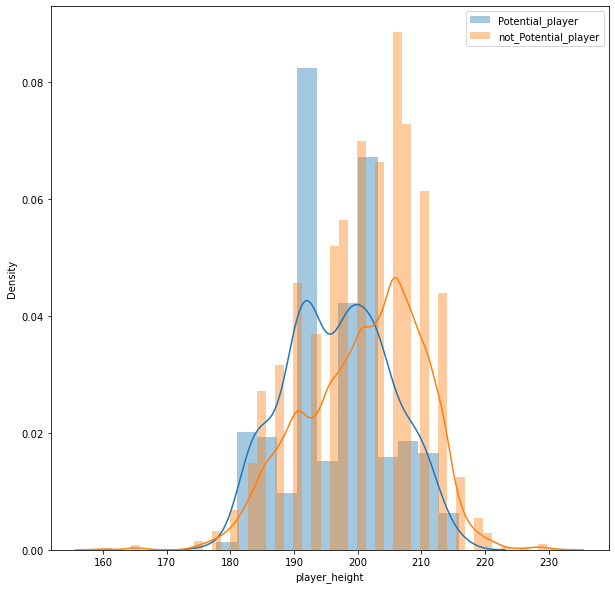

In [30]:
plt.figure(figsize=[10,10])
sns.distplot(nba[nba['potential_player'] ==1]['player_height'],label='Potential_player')
sns.distplot(nba[nba['potential_player'] ==0]['player_height'],label='not_Potential_player')
plt.legend()
plt.show()

pada distribusi di atas tinggi antara potential dan non potential hampir sama

## Scaling dataset

In [31]:
col_name = nba2.columns

In [32]:
scaler = StandardScaler()
scaler.fit(nba2)
nba2_standard = scaler.transform(nba2)


In [33]:
nba2_standard = pd.DataFrame(nba2_standard,columns = col_name)

In [34]:
nba2_standard

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,2.033006,-0.292998,-0.067402,0.119440,-0.408829,5.025470,0.725497,1.502370,2.971452,2.867924,-1.613728,-0.294306,-0.190264,-0.206308
1,0.191372,1.641595,1.375352,-1.476196,-0.981681,-0.825572,-0.838872,1.189615,0.510564,0.146034,-0.199814,-0.789883,-0.874381,-0.206308
2,2.723619,0.536113,-0.428090,-1.715542,-1.234410,-1.025951,-0.783001,0.004436,1.125786,-0.629388,-1.557171,-1.336030,0.178107,-0.206308
3,-0.729445,0.259743,0.004736,0.478458,-0.745801,-0.504967,-0.671261,-0.538771,0.100416,0.114384,-0.350632,-1.103412,-0.569160,-0.206308
4,1.572598,0.536113,0.653975,-0.997505,-0.964832,-0.464892,-0.894742,-0.744531,1.216930,0.589132,-1.104719,1.040719,-0.958580,-0.206308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,0.191372,0.812484,0.653975,0.438567,0.164023,0.737377,-0.391909,0.555873,0.009272,-0.028040,-0.935049,0.980036,-0.705983,-0.206308
11141,-0.959649,-0.569369,-0.247746,-1.476196,-1.167015,-1.306480,-0.950612,-0.020255,-0.856596,-1.325686,-0.407188,-0.284192,-1.032255,-0.206308
11142,0.191372,1.365225,1.375352,-0.119905,-0.341434,0.617150,-0.391909,0.638177,-0.605950,1.190480,-1.236684,1.334020,-0.579685,-0.206308
11143,-0.038832,0.812484,0.329355,-1.276742,-1.015378,-0.224438,-0.783001,-1.172512,0.670066,1.506979,-1.123571,0.130475,-0.790182,-0.206308


### Memisahkan label dengan feture yang sudah di lakukan scaling untuk melakukan modeling

In [35]:
# nba2_standard
# x = nba2_standard[:]

In [36]:
feature = nba2_standard.drop('potential_player', axis=1)
label = nba2_standard['potential_player']

## Data Splitting

In [37]:
# x_train,x_test,y_train,y_test =train_test_split(feature,label,stratify=label,test_size=0.2,random_state=4)

<AxesSubplot:>

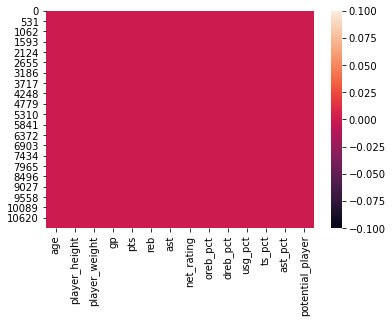

In [38]:
sns.heatmap(nba2_standard.isna())

tidak memiliki null value shingga tidak di perlukan imputation pada dataset

In [39]:
nba_model =nba.drop(['Unnamed: 0', 'Unnamed: 0.1','player_name','college', 'country',
                 'team_abbreviation','season','draft_year','draft_round', 'draft_number','potential_player'], axis = 1)

In [40]:
# data without scaing
nba_norm = nba_model.copy()

In [41]:
scaler.fit(nba_model)
feat_sc = scaler.transform(nba_model)
nba_model_sc = pd.DataFrame(feat_sc, columns = nba_model.columns)
nba_model_sc

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.033006,-0.292998,-0.067402,0.119440,-0.408829,5.025470,0.725497,1.502370,2.971452,2.867924,-1.613728,-0.294306,-0.190264
1,0.191372,1.641595,1.375352,-1.476196,-0.981681,-0.825572,-0.838872,1.189615,0.510564,0.146034,-0.199814,-0.789883,-0.874381
2,2.723619,0.536113,-0.428090,-1.715542,-1.234410,-1.025951,-0.783001,0.004436,1.125786,-0.629388,-1.557171,-1.336030,0.178107
3,-0.729445,0.259743,0.004736,0.478458,-0.745801,-0.504967,-0.671261,-0.538771,0.100416,0.114384,-0.350632,-1.103412,-0.569160
4,1.572598,0.536113,0.653975,-0.997505,-0.964832,-0.464892,-0.894742,-0.744531,1.216930,0.589132,-1.104719,1.040719,-0.958580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,0.191372,0.812484,0.653975,0.438567,0.164023,0.737377,-0.391909,0.555873,0.009272,-0.028040,-0.935049,0.980036,-0.705983
11141,-0.959649,-0.569369,-0.247746,-1.476196,-1.167015,-1.306480,-0.950612,-0.020255,-0.856596,-1.325686,-0.407188,-0.284192,-1.032255
11142,0.191372,1.365225,1.375352,-0.119905,-0.341434,0.617150,-0.391909,0.638177,-0.605950,1.190480,-1.236684,1.334020,-0.579685
11143,-0.038832,0.812484,0.329355,-1.276742,-1.015378,-0.224438,-0.783001,-1.172512,0.670066,1.506979,-1.123571,0.130475,-0.790182


In [42]:
label = nba['potential_player']

In [43]:
x_train,x_test,y_train,y_test =train_test_split(nba_norm,label,stratify=label,test_size=0.2,random_state=4)

## Modeling

In [44]:
dtc = DecisionTreeClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier
gbc = GradientBoostingClassifier()

### DTC

#### Default dtc

In [45]:
nba2_standard.dtypes

age                 float64
player_height       float64
player_weight       float64
gp                  float64
pts                 float64
reb                 float64
ast                 float64
net_rating          float64
oreb_pct            float64
dreb_pct            float64
usg_pct             float64
ts_pct              float64
ast_pct             float64
potential_player    float64
dtype: object

In [46]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
dtc_pred = dtc.predict(x_test)
dtc_proba = dtc.predict_proba(x_test)

In [48]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       0.99      0.95      0.97        91

    accuracy                           1.00      2229
   macro avg       0.99      0.97      0.98      2229
weighted avg       1.00      1.00      1.00      2229



In [49]:
tn_dtc, fp_dtc, fn_dtc, tp_dtc = confusion_matrix(y_test,dtc_pred,labels=[0,1]).ravel()
print(confusion_matrix(y_test, dtc_pred))

[[2137    1]
 [   5   86]]


In [50]:
fpr_dtc, tpr_dtc, thr_dtc = roc_curve(y_test, dtc_proba[:,1])
roc_auc = auc(fpr_dtc, tpr_dtc)
roc_auc

0.972293609103712

Text(0.5, 0, 'False Positive Rate')

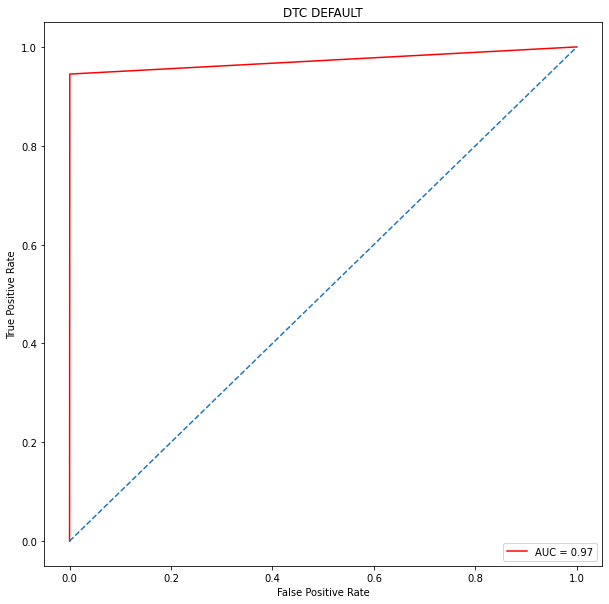

In [51]:
plt.figure(figsize=(10,10))
plt.title('DTC DEFAULT')
plt.plot(fpr_dtc,tpr_dtc, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Dtc Tuned Model

In [52]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [53]:
model = dtc
balance = SMOTE()
skfold = StratifiedKFold(n_splits=5)
scale = StandardScaler()

estimator = Pipeline([
    ('sc',StandardScaler()),
    ('balancing', balance),
    ('clf', model)
])

dtc_hyper_param = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [5,10,15,20],
    'clf__min_samples_split': [5,6,7,8]
}

grid_search_dtc = GridSearchCV(
    estimator,
    param_grid = dtc_hyper_param,
    cv = StratifiedKFold(),
    scoring = 'roc_auc',
    n_jobs = -1,
    verbose = 1
)

## Benchmark

In [54]:
model_cv = cross_val_score(estimator, x_train, y_train, scoring='roc_auc')
print('CV Score:', model_cv)
print('CV Score Mean:', model_cv.mean())
print('CV Score Std:', model_cv.std())

CV Score: [0.97945205 1.         0.98513178 0.99256589 0.99256589]
CV Score Mean: 0.9899431226467996
CV Score Std: 0.007044290247238586


## With Balancing Smote()

karena pada dataset terdapat imbalance hanya terdapat 4% kandidat yang lolos maka kita akan menggunakan balancing pada dataset

In [55]:
grid_search_dtc.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('balancing', SMOTE()),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [5, 10, 15, 20],
                         'clf__min_samples_split': [5, 6, 7, 8]},
             scoring='roc_auc', verbose=1)

In [56]:
print('estimator dtc tuned score:', grid_search_dtc.best_score_)
print('estimator dtc best params:', grid_search_dtc.best_params_)

estimator dtc tuned score: 0.9955972122086036
estimator dtc best params: {'clf__criterion': 'entropy', 'clf__max_depth': 15, 'clf__min_samples_split': 6}


In [57]:
dtc_tuned = grid_search_dtc.best_estimator_

In [58]:
dtc_tuned_pred = dtc_tuned.predict(x_test)
dtc_tuned_prob = dtc_tuned.predict_proba(x_test)

In [59]:
tn_dtc_tuned, fp_dtc_tuned, fn_dtc_tuned, tp_dtc_tuned = confusion_matrix(y_test,dtc_tuned_pred,labels=[0,1]).ravel()
print(confusion_matrix(y_test, dtc_tuned_pred))

[[2138    0]
 [   0   91]]


In [60]:
fpr_dtc_tuned, tpr_dtc_tuned, thr_dtc_tuned = roc_curve(y_test, dtc_tuned_prob[:,1])
roc_auc_tuned = auc(fpr_dtc_tuned, tpr_dtc_tuned)
roc_auc_tuned

1.0

In [61]:
print(classification_report(y_test, dtc_tuned_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       1.00      1.00      1.00        91

    accuracy                           1.00      2229
   macro avg       1.00      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229



pada hasil DTC_TUNED model menignkat di bandingkan pada benchmark baik pada precision maupun recall

Text(0.5, 0, 'False Positive Rate')

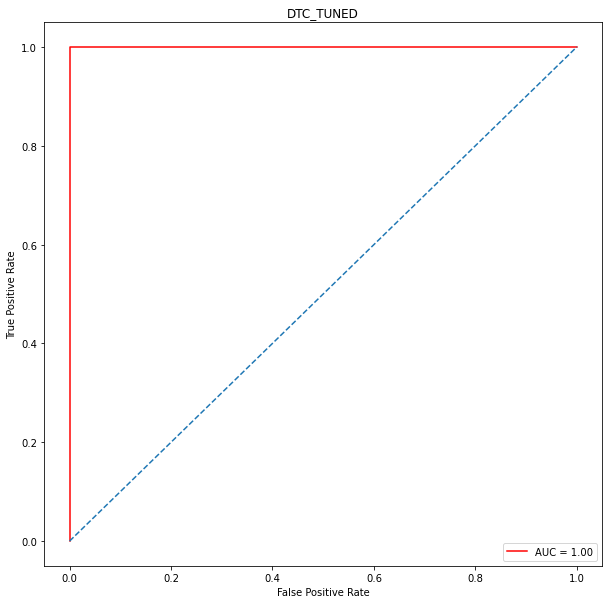

In [62]:
plt.figure(figsize=(10,10))
plt.title('DTC_TUNED')
plt.plot(fpr_dtc_tuned,tpr_dtc_tuned, color='red',label = 'AUC = %0.2f' % roc_auc_tuned)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Compare tuned and default

In [63]:
dtc_comparison = pd.DataFrame({
  "DTC Default":[accuracy_score(y_test,dtc_pred),precision_score(y_test,dtc_pred),recall_score(y_test,dtc_pred),f1_score(y_test,dtc_pred),
                tp_dtc,tn_dtc,fp_dtc,fn_dtc],
    "DTC TUNED":[accuracy_score(y_test,dtc_tuned_pred),precision_score(y_test,dtc_tuned_pred),recall_score(y_test,dtc_tuned_pred),f1_score(y_test,dtc_tuned_pred),
                tp_dtc_tuned,tn_dtc_tuned,fp_dtc_tuned,fn_dtc_tuned],
},index = ['Acuracy Score','precision Score','recall score','f1 score','TP','TN','FP','FN'])

In [64]:
dtc_comparison

,DTC Default,DTC TUNED
Acuracy Score,0.997308,1.0
precision Score,0.988506,1.0
recall score,0.945055,1.0
f1 score,0.966292,1.0
TP,86.000000,91.0
TN,2137.000000,2138.0
FP,1.000000,0.0
FN,5.000000,0.0


# LOGISTIC REGRESSION

In [65]:
lr

LogisticRegression()

## Default

In [66]:
lr.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
lr_pred = lr.predict(x_test)
lr_prob = lr.predict_proba(x_test)

In [68]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2138
           1       0.68      0.45      0.54        91

    accuracy                           0.97      2229
   macro avg       0.83      0.72      0.76      2229
weighted avg       0.96      0.97      0.97      2229



In [69]:
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test,lr_pred,labels=[0,1]).ravel()
print(confusion_matrix(y_test, lr_pred))

[[2119   19]
 [  50   41]]


In [70]:
fpr_lr, tpr_lr, thr_lr = roc_curve(y_test, lr_prob[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lr

0.9739769117692411

Text(0.5, 0, 'False Positive Rate')

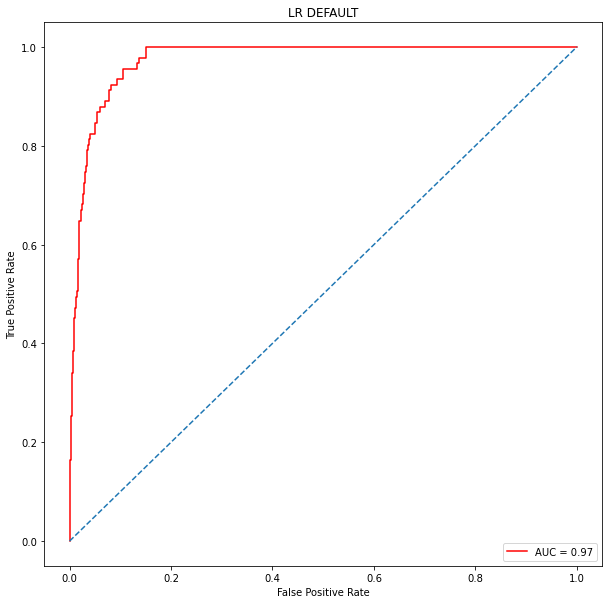

In [71]:
plt.figure(figsize=(10,10))
plt.title('LR DEFAULT')
plt.plot(fpr_lr,tpr_lr, color='red',label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## LR TUNED MODEL

In [72]:
model_lr = lr
balance = SMOTE()
skfold = StratifiedKFold(n_splits=5)
scale = StandardScaler()

lr_estimator = Pipeline([
    ('sc',StandardScaler()),
    ('balancing', balance),
    ('clf',model_lr)
    
])

lr_hyper_param = {
    'clf__C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
    'clf__max_iter':[100, 200, 300, 400, 500, 1000],
    'clf__solver': ['liblinear', 'newton-cg','sag']
}

grid_search_lr = GridSearchCV(
    lr_estimator,
    param_grid = lr_hyper_param,
    cv = StratifiedKFold(),
    scoring ='roc_auc',
    n_jobs = -1,
    verbose =1
)

## Benchmark

In [73]:
lr_model_cv = cross_val_score(estimator, x_train, y_train, scoring='roc_auc')
print('CV Score:', lr_model_cv)
print('CV Score Mean:', lr_model_cv.mean())
print('CV Score Std:', lr_model_cv.std())

CV Score: [0.97231051 0.99970777 0.98513178 0.98600897 0.9994152 ]
CV Score Mean: 0.9885148484580759
CV Score Std: 0.010241136587341186


## TUNED LR MODEL

In [74]:
grid_search_lr.fit(x_train,y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('balancing', SMOTE()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1,
                                    0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'clf__max_iter': [100, 200, 300, 400, 500, 1000],
                         'clf__solver': ['liblinear', 'newton-cg', 'sag']},
             scoring='roc_auc', verbose=1)

In [75]:
print('estimator dtc tuned score:', grid_search_lr.best_score_)
print('estimator dtc best params:', grid_search_lr.best_params_)

estimator dtc tuned score: 0.983376884087783
estimator dtc best params: {'clf__C': 0.5, 'clf__max_iter': 300, 'clf__solver': 'liblinear'}


In [76]:
lr_tuned = grid_search_lr.best_estimator_
lr_tuned_pred = lr_tuned.predict(x_test)
lr_tuned_prob = lr_tuned.predict_proba(x_test)

In [77]:
tn_lr_tuned, fp_lr_tuned, fn_lr_tuned, tp_lr_tuned = confusion_matrix(y_test,lr_tuned_pred,labels=[0,1]).ravel()
print(confusion_matrix(y_test, lr_tuned_pred))

[[2012  126]
 [   8   83]]


In [78]:
fpr_lr_tuned, tpr_lr_tuned, thr_lr_tuned = roc_curve(y_test, lr_tuned_prob[:,1])
roc_auc_tuned_lr = auc(fpr_lr_tuned, tpr_lr_tuned)
roc_auc_tuned_lr

0.978993410705291

In [79]:
print(classification_report(y_test, lr_tuned_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2138
           1       0.40      0.91      0.55        91

    accuracy                           0.94      2229
   macro avg       0.70      0.93      0.76      2229
weighted avg       0.97      0.94      0.95      2229



pada hasil lr_tuned nila recal naik tetpai pada precision mengalami penurunan sehingga akan memilih model DTC_tuned

Text(0.5, 0, 'False Positive Rate')

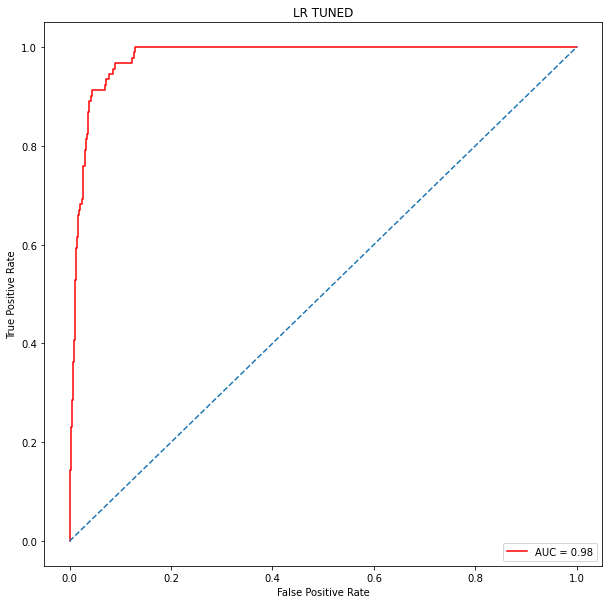

In [80]:
plt.figure(figsize=(10,10))
plt.title('LR TUNED')
plt.plot(fpr_lr_tuned,tpr_lr_tuned, color='red',label = 'AUC = %0.2f' % roc_auc_tuned_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Model compare

In [81]:
lr_comparison = pd.DataFrame({
  "LR Default":[accuracy_score(y_test,lr_pred),precision_score(y_test,lr_pred),recall_score(y_test,lr_pred),f1_score(y_test,lr_pred),
                tp_lr,tn_lr,fp_lr,fn_lr],
    "LR TUNED":[accuracy_score(y_test,lr_tuned_pred),precision_score(y_test,lr_tuned_pred),recall_score(y_test,lr_tuned_pred),f1_score(y_test,lr_tuned_pred),
                tp_lr_tuned,tn_lr_tuned,fp_lr_tuned,fn_lr_tuned],
},index = ['Acuracy Score','precision Score','recall score','f1 score','TP','TN','FP','FN'])

In [82]:
lr_comparison

,LR Default,LR TUNED
Acuracy Score,0.969044,0.939883
precision Score,0.683333,0.397129
recall score,0.450549,0.912088
f1 score,0.543046,0.553333
TP,41.000000,83.000000
TN,2119.000000,2012.000000
FP,19.000000,126.000000
FN,50.000000,8.000000


## DTC LR

In [83]:
lrdtc_comparison = pd.DataFrame({
  "LR Default":[accuracy_score(y_test,lr_pred),precision_score(y_test,lr_pred),recall_score(y_test,lr_pred),f1_score(y_test,lr_pred),
                tp_lr,tn_lr,fp_lr,fn_lr],
    "DTC TUNED":[accuracy_score(y_test,dtc_tuned_pred),precision_score(y_test,dtc_tuned_pred),recall_score(y_test,dtc_tuned_pred),f1_score(y_test,dtc_tuned_pred),
                tp_dtc_tuned,tn_dtc_tuned,fp_dtc_tuned,fn_dtc_tuned],
},index = ['Acuracy Score','precision Score','recall score','f1 score','TP','TN','FP','FN'])

In [84]:
lrdtc_comparison

,LR Default,DTC TUNED
Acuracy Score,0.969044,1.0
precision Score,0.683333,1.0
recall score,0.450549,1.0
f1 score,0.543046,1.0
TP,41.000000,91.0
TN,2119.000000,2138.0
FP,19.000000,0.0
FN,50.000000,0.0


## untuk melakukan predict data baru kita akan menggunakan DTC TUNED karena model lebih stabil

## Mengatur threshold

In [85]:
dtc_thr = pd.DataFrame({'thr':thr_dtc,'tpr':tpr_dtc,'fpr':fpr_dtc})
dtc_thr.sort_values('tpr',ascending=False)

,thr,tpr,fpr
2,0.0,1.000000,1.000000
1,1.0,0.945055,0.000468
0,2.0,0.000000,0.000000


In [86]:
dtc_prob = dtc_proba[:,1]
dtc_pred_18 = [0 if x < 0.000018 else 1 for x in dtc_prob]
print(dtc_pred_18)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 

In [87]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       0.99      0.95      0.97        91

    accuracy                           1.00      2229
   macro avg       0.99      0.97      0.98      2229
weighted avg       1.00      1.00      1.00      2229



In [88]:
print(classification_report(y_test, dtc_pred_18))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       0.99      0.95      0.97        91

    accuracy                           1.00      2229
   macro avg       0.99      0.97      0.98      2229
weighted avg       1.00      1.00      1.00      2229



pada perubahan thr tidak berpengaruh apa apa

##  LR

In [89]:
lr_thr = pd.DataFrame({'thr':thr_lr,'tpr':tpr_lr,'fpr':fpr_lr})
lr_thr.sort_values('tpr',ascending=False)

,thr,tpr,fpr
111,2.562635e-08,1.000000,1.000000
110,1.517443e-02,1.000000,0.150608
109,1.517806e-02,0.989011,0.150608
108,1.524671e-02,0.989011,0.150140
107,1.542095e-02,0.978022,0.150140
...,...,...,...
5,8.929953e-01,0.142857,0.001403
2,9.339176e-01,0.131868,0.000000
3,9.243722e-01,0.131868,0.000468
1,9.993074e-01,0.010989,0.000000


In [90]:
lr_proba = lr_prob[:,1]
lr_pred_18 = [0 if x < 0.000018 else 1 for x in lr_proba]
print(lr_pred_18)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [91]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2138
           1       0.68      0.45      0.54        91

    accuracy                           0.97      2229
   macro avg       0.83      0.72      0.76      2229
weighted avg       0.96      0.97      0.97      2229



In [92]:
print(classification_report(y_test, lr_pred_18))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03      2138
           1       0.04      1.00      0.08        91

    accuracy                           0.06      2229
   macro avg       0.52      0.51      0.06      2229
weighted avg       0.96      0.06      0.04      2229



bila thr di turunkan model semakin buruk

## deployment and predict new data

In [93]:
import pickle
import joblib

In [94]:
dtc_tuned.fit(nba_model_sc,label)
filename = 'dtc_tuned.sav'
pickle.dump(dtc_tuned, open(filename, 'wb'))

In [95]:
filename = 'dtc_tuned.sav'
loaded_model = pickle.load((open(filename, 'rb')))

In [96]:
loaded_model

Pipeline(steps=[('sc', StandardScaler()), ('balancing', SMOTE()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=15,
                                        min_samples_split=6))])

In [97]:
test_x = new

In [98]:
test_x = new.drop(['Unnamed: 0', 'player_id','country','college'], axis=1)

In [99]:
new_test = loaded_model.predict(test_x)

In [100]:
results = pd.DataFrame({'id': new.index, 'label': new_test})
results

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
495,495,0
496,496,0
497,497,0
498,498,0


In [101]:
results['label'].value_counts()

0    488
1     12
Name: label, dtype: int64

## pada hasil predict di atas terdapat 12 potential_player yang baru untuk di recruit